In [8]:
import os.path

import pandas as pd 
import numpy as np

In [9]:
results = []
result_nosplit = pd.read_csv(os.path.join("result","nosplit_test.csv"),sep='\t')
result_nosplit

,model,Accuracy,Precision,Recall,F1,MCC
0,GB,0.65789,1.00000,0.31579,0.48000,0.43301
1,GNB,0.90482,0.87799,0.94737,0.91010,0.81475
2,LR,0.76260,0.99807,0.52632,0.68917,0.59601
3,RF,0.73684,1.00000,0.47368,0.64286,0.55709
4,SVM,0.65752,0.99797,0.31579,0.47974,0.43169


In [10]:
result_wgan = pd.read_csv(os.path.join("result","2023-10-18 20h27m","GAN_test_mcc.csv"),sep='\t')[:5]
result_wgan

,model,Accuracy,Precision,Recall,F1,MCC
0,GB,0.923250,0.938457,0.909605,0.922013,0.849518
1,GNB,0.909415,0.867134,0.975022,0.916327,0.828997
2,LR,0.931754,0.935295,0.931311,0.932145,0.865686
3,RF,0.931990,0.934757,0.932798,0.932735,0.865919
4,SVM,0.921886,0.933397,0.912281,0.921482,0.846186


In [11]:
result_stock= pd.read_csv(os.path.join("..","ML_RNA_methylation","result","2023-10-21 15h36m","ML_test.csv"),sep='\t')[:5]
result_stock

,Unnamed: 0,model,Accuracy,Precision,Recall,F1,MCC
0,0,GB,0.895709,0.883472,0.918934,0.898973,0.795738
1,1,GNB,0.871970,0.827903,0.950680,0.882953,0.757092
2,2,LR,0.898342,0.876725,0.934240,0.902985,0.801620
3,3,RF,0.879595,0.864507,0.908541,0.884034,0.763919
4,4,SVM,0.890964,0.876310,0.917800,0.894756,0.786360


In [12]:
df = pd.DataFrame(columns=['bar_name','classifier','score'])
for result,name in [(result_stock,'without WGAN-GP'),(result_wgan,'overall'),(result_nosplit,'without DBC')]:
    for idx,item in result.iterrows():
        df.loc[len(df)] = {
            'classifier':item['model'],
            'bar_name':name,
            'score':item['MCC']
        }
df

,bar_name,classifier,score
0,without WGAN-GP,GB,0.795738
1,without WGAN-GP,GNB,0.757092
2,without WGAN-GP,LR,0.801620
3,without WGAN-GP,RF,0.763919
4,without WGAN-GP,SVM,0.786360
5,overall,GB,0.849518
6,overall,GNB,0.828997
7,overall,LR,0.865686
8,overall,RF,0.865919
9,overall,SVM,0.846186


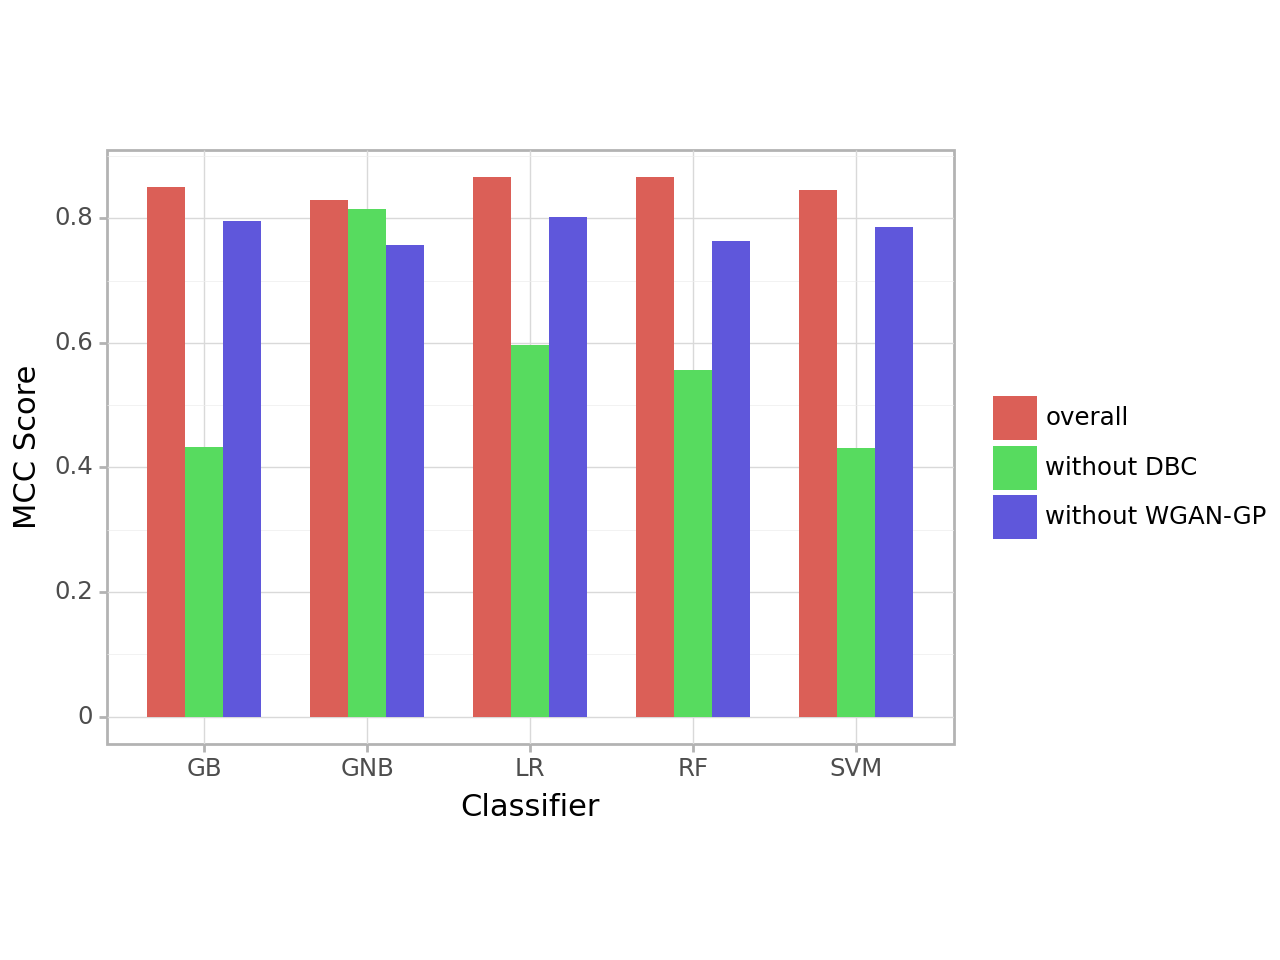

C:\CondaEnvs\tmp0\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\CondaEnvs\tmp0\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: plot_ablation.svg


In [13]:
from plotnine import *

# 示例数据

# 创建绘图对象并设置数据和映射
plot = ggplot(df, aes(x='classifier', y='score', fill='bar_name',shape='bar_name') )
fill_colors = {'without WGAN-GP':'grey','overall':'black','without DBC':'white'}
fill_patterns = {'without WGAN-GP':'dotted','without DBC':'dashed'}
# 添加堆叠柱状图层
# plot += geom_bar(stat='identity', position='dodge') + scale_fill_manual(values=fill_colors, guide=guide_legend(override_aes={'linetype': fill_patterns}))
plot += geom_bar(stat='identity', position='dodge' ,width = 0.7)

# 设置X轴标签
plot += xlab('Classifier')

# 设置Y轴标签
plot += ylab('MCC Score')
plot +=   scale_y_continuous(breaks=[0,0.2,0.4,0.6,0.8,1.0])
plot += labs(fill = '')

plot += theme_light()
plot += theme(aspect_ratio=0.7)

# 显示图形
print(plot)
ggsave(plot,"plot_ablation.svg",bbox_inches='tight')


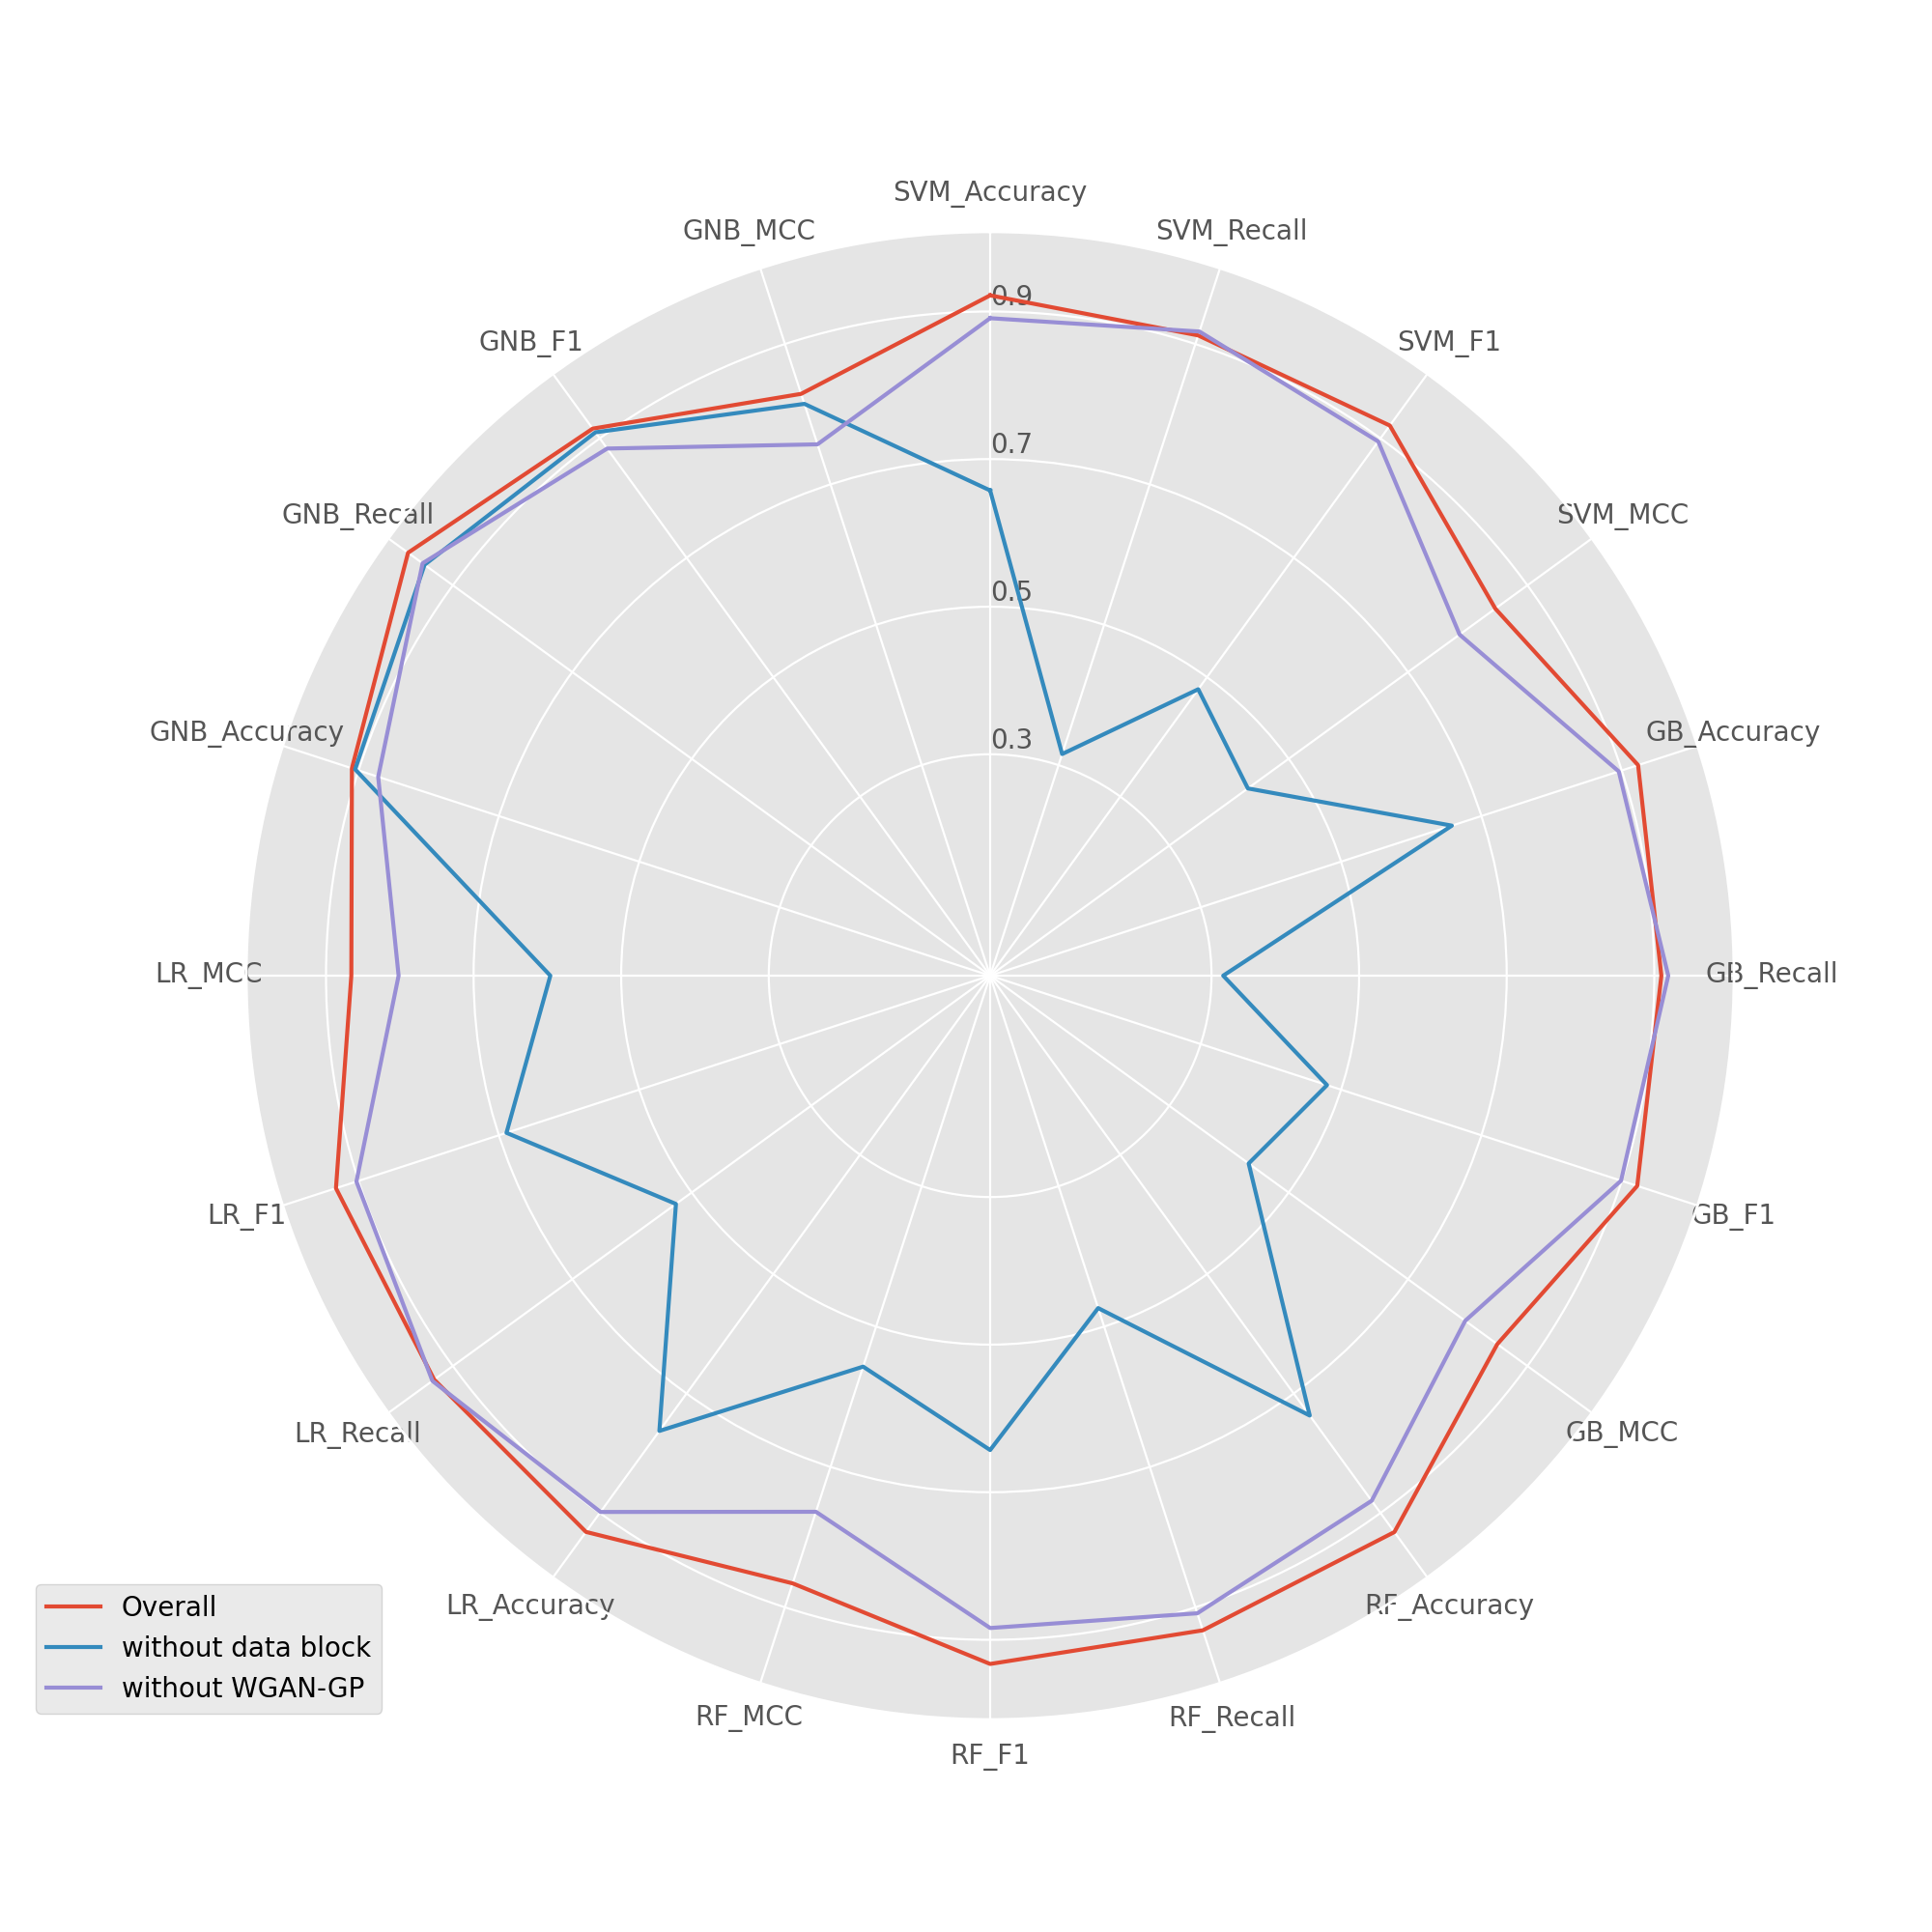

In [39]:
import matplotlib.pyplot as plt
# 数据示例，替换为你的实际数据
plt.style.use('ggplot')
methods = ['Overall', 'without data block', 'without WGAN-GP']
metrics = ["Accuracy","Recall","F1","MCC"]
classifiers = ["SVM","GB","RF","LR","GNB"]
indicators = []
results.append(result_wgan)
results.append(result_nosplit)
results.append(result_stock)
for classifier in classifiers:
    for metric in metrics:
        indicators.append(f'{classifier}_{metric}')

# 角度设置
angles = np.linspace(0, 2 * np.pi, len(indicators), endpoint=False)
# 使雷达图封闭
# data = np.concatenate((data, data[:, 0:1]), axis=1)
angles = np.concatenate((angles, [angles[0]]))

# 创建雷达图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
# ax.set_rorigin(0.3)
# 绘制雷达图
for i, method in enumerate(methods):
    data = results[i]
    # data.set_index("model")
    row = []
    
    for classifier in classifiers:
        for metric in metrics:
            row.append(data.loc[classifier,metric])
            # indicators.append(f'{classifier}_{metric}')
    row.append(data.loc["SVM","Accuracy"])
    ax.plot(angles, row, label=method)

# 添加标签
ax.set_thetagrids(angles[:-1] * 180/np.pi, indicators)
ax.set_rlabel_position(0)

# 添加网格线
ax.set_rgrids(np.arange(0.3, 1.1, 0.2), labels=[i.round(2) for i in np.arange(0.3, 1.1, 0.2)], angle=0)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 设置标题
# plt.title('Overview of ablation study')

plt.savefig('plot_radar.svg',  bbox_inches='tight')
# 显示图形
plt.show()

